In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
!pip install xgboost

## Loading dataset

In [3]:
df=pd.read_csv("ds_salaries.csv")

## Data Processing

In [4]:
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [5]:
df.shape

(607, 12)

In [6]:
df.tail()

Unnamed: 0  work_year experience_level employment_type      job_title  \
602         602       2022               SE              FT  Data Engineer   
603         603       2022               SE              FT  Data Engineer   
604         604       2022               SE              FT   Data Analyst   
605         605       2022               SE              FT   Data Analyst   
606         606       2022               MI              FT   AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L

In [7]:
df=df.drop(columns='Unnamed: 0',axis=1)

In [8]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### Checking null variables

In [11]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Checking unique variables

In [12]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

### Checking duplicated variables

In [13]:
df.duplicated().sum()

42

In [14]:
for col in df.columns:
    print(col)
    print("===================")
    print("Total Number of Variables in the column\n", df[col].value_counts())

work_year
Total Number of Variables in the column
 2022    318
2021    217
2020     72
Name: work_year, dtype: int64
experience_level
Total Number of Variables in the column
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type
Total Number of Variables in the column
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title
Total Number of Variables in the column
 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant             

## Data Visualization

In [15]:
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])

In [16]:
 #Remote_ratio
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

df['employment_type'] = df['employment_type'].map(employment_type_dict)

# ISO
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
df.company_size=df['company_size'].map(company_size_dict)

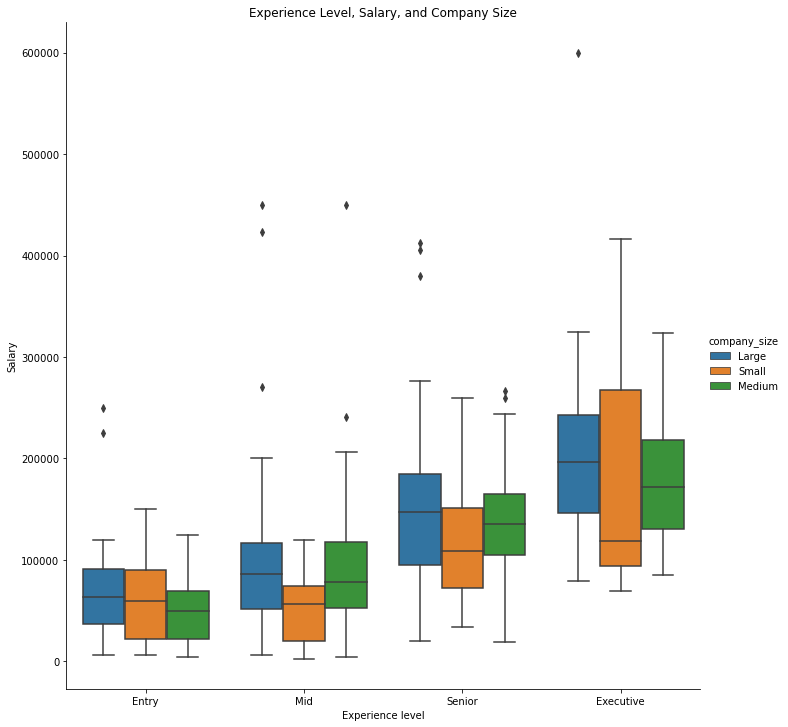

In [17]:
exp_order=['Entry','Mid','Senior','Executive']
sns.catplot(data=df,
           x='experience_level',
           y='salary_in_usd',
           order=exp_order,
           height=10,
           kind='box',
           hue='company_size')
plt.title('Experience Level, Salary, and Company Size')
plt.xlabel('Experience level')
plt.ylabel('Salary');
plt.show()

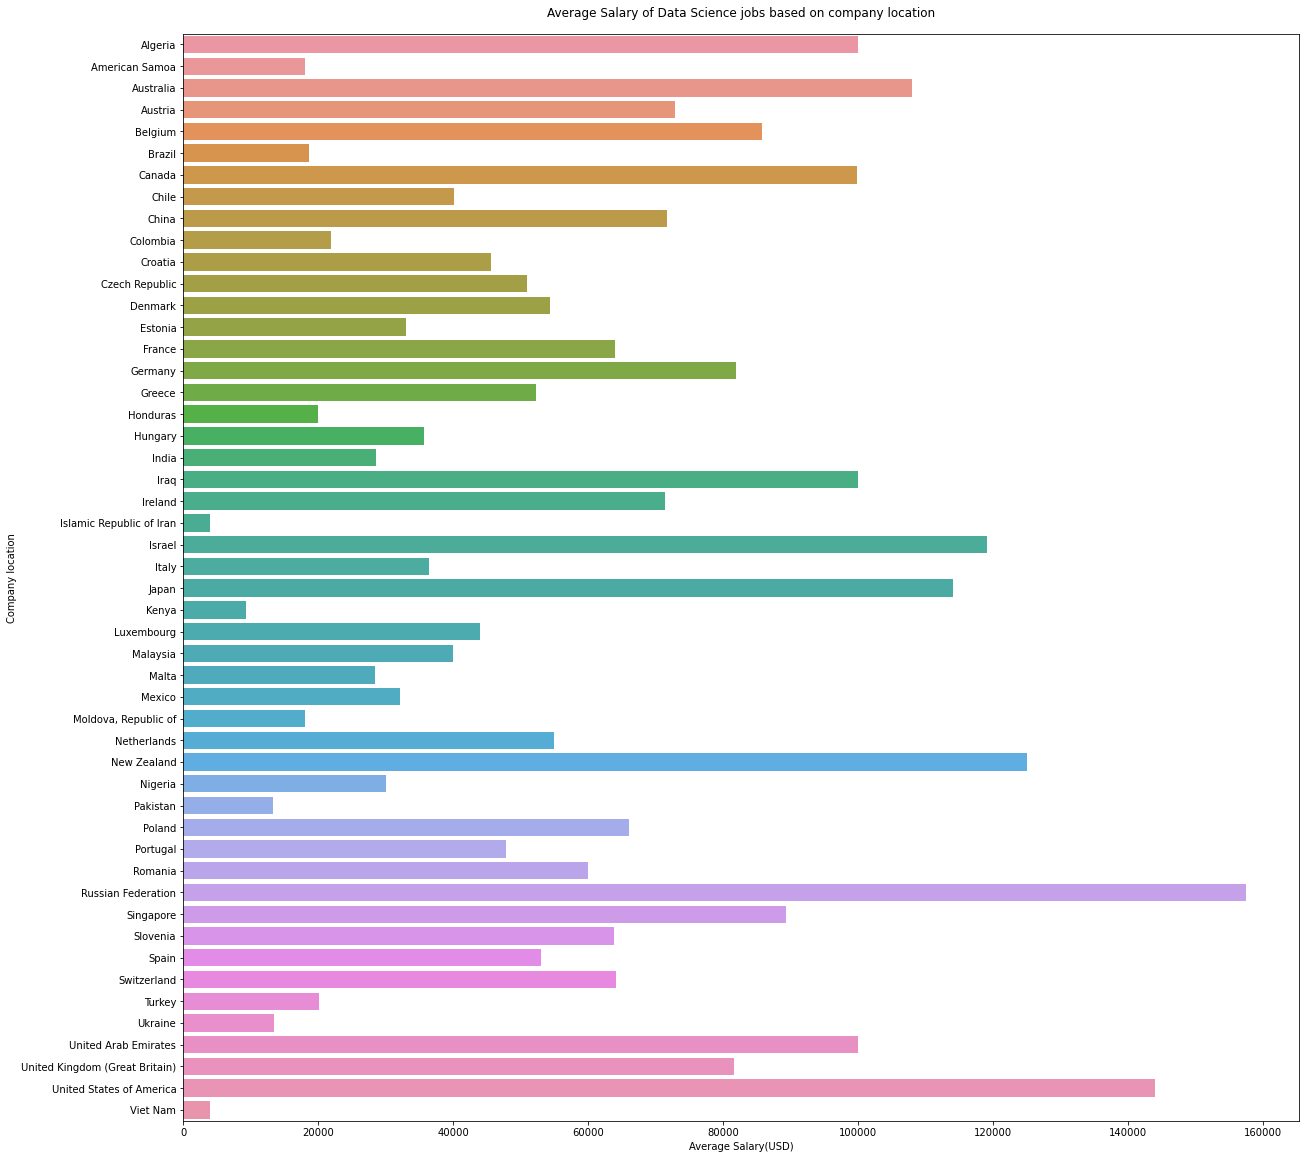

In [18]:
avg_sal_per_comp_location=df.groupby('company_location').mean()['salary_in_usd']

plt.figure(figsize=(20,20))
sns.barplot(x=avg_sal_per_comp_location.values,y=avg_sal_per_comp_location.index)
plt.ylabel('Company location')
plt.xlabel('Average Salary(USD)')
plt.title('Average Salary of Data Science jobs based on company location', y=1.01);

In [19]:
salary = df['salary']
df_2 = df.drop(columns="salary",axis=1)

array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

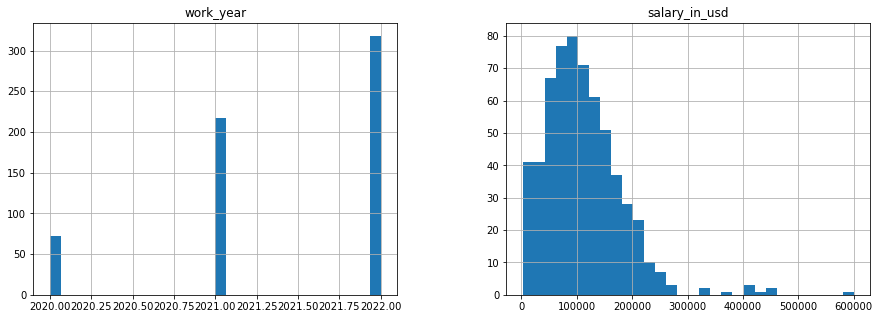

In [20]:
df_2.hist(bins=30, figsize=(15, 5))

## Work Year

In [21]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [22]:
work_year_counts = df['work_year'].value_counts()

<AxesSubplot:ylabel='work_year'>

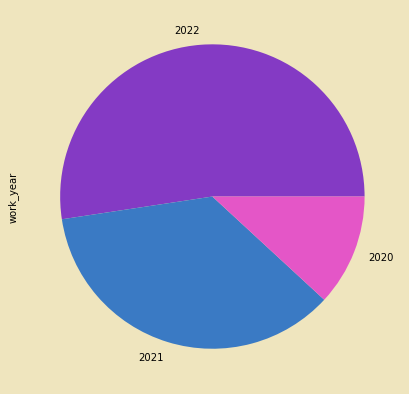

In [23]:
fig, ax = plt.subplots(figsize = (7,7))
fig.set_facecolor('#EFE5BE')
work_year_counts.plot(kind="pie",colors=['#843AC4','#3A7AC4','#E456C7'])

## Experience Level

In [24]:
df['experience_level'].value_counts()

Senior       280
Mid          213
Entry         88
Executive     26
Name: experience_level, dtype: int64

In [25]:
experience_level_counts = df['experience_level'].value_counts()

<AxesSubplot:ylabel='experience_level'>

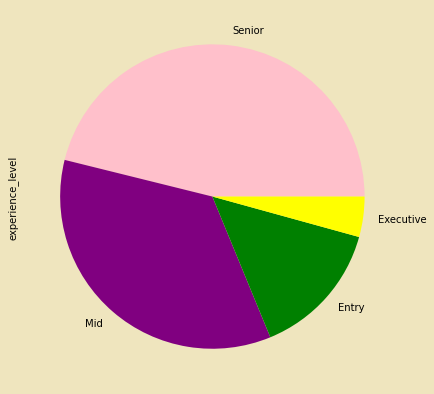

In [26]:
fig, ax = plt.subplots(figsize = (7,7))
fig.set_facecolor('#EFE5BE')
experience_level_counts.plot(kind="pie",colors=['pink','purple','green','yellow'])

## Remote Ratio

In [27]:
df['remote_ratio'].value_counts()

Fully Remote        381
On-site             127
Partially Remote     99
Name: remote_ratio, dtype: int64

In [28]:
remote_ratio_counts = df['remote_ratio'].value_counts()

<AxesSubplot:ylabel='remote_ratio'>

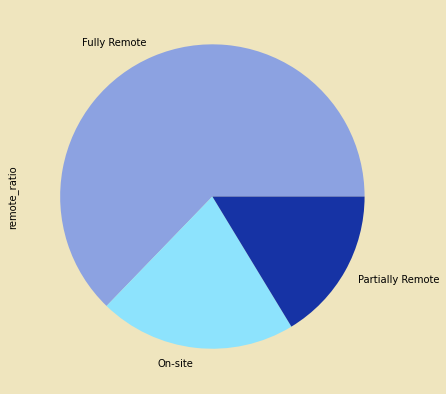

In [29]:
fig, ax = plt.subplots(figsize = (7,7))
fig.set_facecolor('#EFE5BE')
remote_ratio_counts.plot(kind="pie",colors=['#8CA2E1','#8DE3FD','#1633A5'])

## Job Title

In [30]:
job_10 = df['job_title'].value_counts()[:10]
x = job_10.index
y = job_10.values

In [31]:
colors = ['#6023DA','#003f5c','#A923DA','#2f4b7c','#665191','#a05195','#d45087',
          '#f95d6a','#ff7c43','#ffa600']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

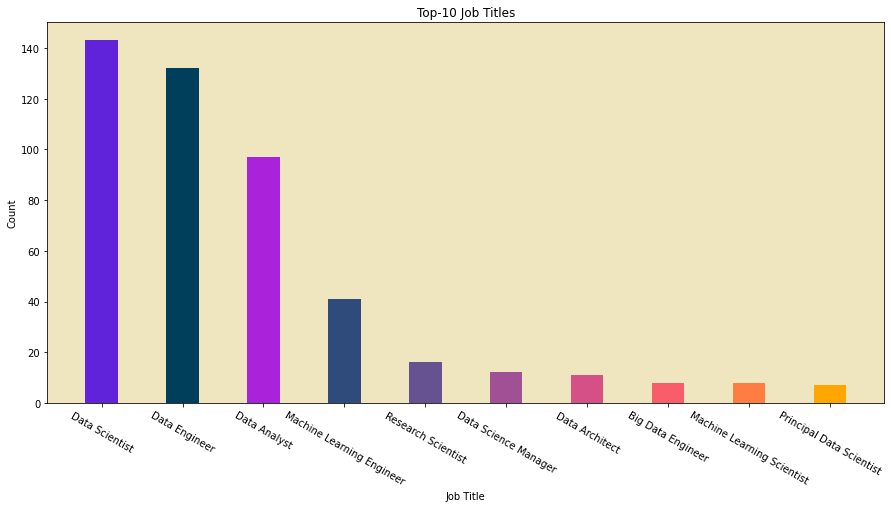

In [32]:
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.set_facecolor("#EFE5BE")
plt.bar(x=x, height=y, width=0.4,color=colors)
plt.title('Top-10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=-30)

## Label Encoding

In [33]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
df['company_size']= label_encoder.fit_transform(df['company_size'])
df['company_size'].unique()

array([0, 2, 1])

In [36]:
df['experience_level']= label_encoder.fit_transform(df['experience_level'])
df['experience_level'].unique()

array([2, 3, 0, 1])

In [37]:
df['job_title']= label_encoder.fit_transform(df['job_title'])
df['job_title'].unique()

array([22, 41,  7, 47, 38, 12, 34,  8, 33, 32, 17, 19,  5, 25, 48, 40, 18,
       39, 36,  1, 10, 46, 21, 29,  0, 13,  3, 42,  9, 28, 11, 24, 20, 45,
       37,  4, 15, 30, 23, 16, 27, 44,  6, 49,  2, 26, 31, 43, 35, 14])

In [38]:
df['salary_currency']= label_encoder.fit_transform(df['salary_currency'])
df['salary_currency'].unique()

array([ 7, 16,  8,  9, 10, 11,  5, 12,  2,  6, 13, 14,  4,  1, 15,  0,  3])

In [39]:
df['employment_type']= label_encoder.fit_transform(df['employment_type'])
df['employment_type'].unique()

array([2, 0, 3, 1])

In [40]:
df['company_location']= label_encoder.fit_transform(df['company_location'])
df['company_location'].unique()

array([15, 25, 47, 17, 48, 18, 33, 14, 19, 35,  8, 16, 46, 32, 30,  6,  3,
       34, 42, 37, 12, 24, 10, 27, 36, 40, 38, 20,  5,  4, 45, 23, 39, 29,
        7, 22,  9, 31, 26, 41, 43, 49,  1, 44, 11,  0, 13, 28,  2, 21])

In [41]:
df['employee_residence']= label_encoder.fit_transform(df['employee_residence'])
df['employee_residence'].unique()

array([17, 27, 52, 19, 53, 21, 35, 16, 22, 37, 39, 40, 10, 18, 51, 34, 32,
        8,  3, 36, 38, 46, 14, 43, 26, 12,  7, 44,  6, 23, 54,  4, 50, 31,
        9, 42, 25, 11, 33, 28, 45, 20, 49, 55, 41, 29, 13,  1,  0, 48, 30,
       15,  2,  5, 24, 47])

In [42]:
df.remote_ratio.replace(['Fully Remote','Partially Remote','On-site'],[100,50,0], inplace=True)

In [43]:
from scipy import stats

z = np.abs(stats.zscore(df['salary_in_usd']))
threshold = 3
outliers = np.where(z > threshold)

df = df.drop(outliers[0])
df = df.dropna()

## Correlation

In [44]:
df.corr()

work_year  experience_level  employment_type  job_title  \
work_year            1.000000          0.299838         0.008967  -0.150235   
experience_level     0.299838          1.000000        -0.062986   0.033584   
employment_type      0.008967         -0.062986         1.000000  -0.074783   
job_title           -0.150235          0.033584        -0.074783   1.000000   
salary              -0.087976         -0.023649         0.001439   0.027229   
salary_currency      0.213494          0.202937        -0.083357  -0.158253   
salary_in_usd        0.268942          0.396838        -0.083349   0.107082   
employee_residence   0.261112          0.233999        -0.101177  -0.146783   
remote_ratio         0.076260          0.054770        -0.038213  -0.058139   
company_location     0.244036          0.260771        -0.077489  -0.193155   
company_size         0.074809         -0.063965         0.064676  -0.041748   

                      salary  salary_currency  salary_in_usd  \
work_year          -0.087976         0.213494       0.268942   
experience_level   -0.023649         0.202937       0.396838   
employment_type     0.001439        -0.083357      -0.083349   
job_title           0.027229        -0.158253       0.107082   
salary              1.000000        -0.121850      -0.107708   
salary_currency    -0.121850         1.000000       0.454505   
salary_in_usd      -0.107708         0.454505       1.000000   
employee_residence -0.166932         0.601849       0.445867   
remote_ratio       -0.014960         0.147982       0.136860   
company_location   -0.148545         0.630081       0.419694   
company_size       -0.080153         0.047028      -0.124618   

                    employee_residence  remote_ratio  company_location  \
work_year                     0.261112      0.076260          0.244036   
experience_level              0.233999      0.054770          0.260771   
employment_type              -0.101177     -0.038213         -0.077489   
job_title                    -0.146783     -0.058139         -0.193155   
salary                       -0.166932     -0.014960         -0.148545   
salary_currency               0.601849      0.147982          0.630081   
salary_in_usd                 0.445867      0.136860          0.419694   
employee_residence            1.000000      0.085464          0.876640   
remote_ratio                  0.085464      1.000000          0.107692   
company_location              0.876640      0.107692          1.000000   
company_size                 -0.083899      0.029029         -0.040223   

                    company_size  
work_year               0.074809  
experience_level       -0.063965  
employment_type         0.064676  
job_title              -0.041748  
salary                 -0.080153  
salary_currency         0.047028  
salary_in_usd          -0.124618  
employee_residence     -0.083899  
remote_ratio            0.029029  
company_location       -0.040223  
company_size            1.000000

<AxesSubplot:>

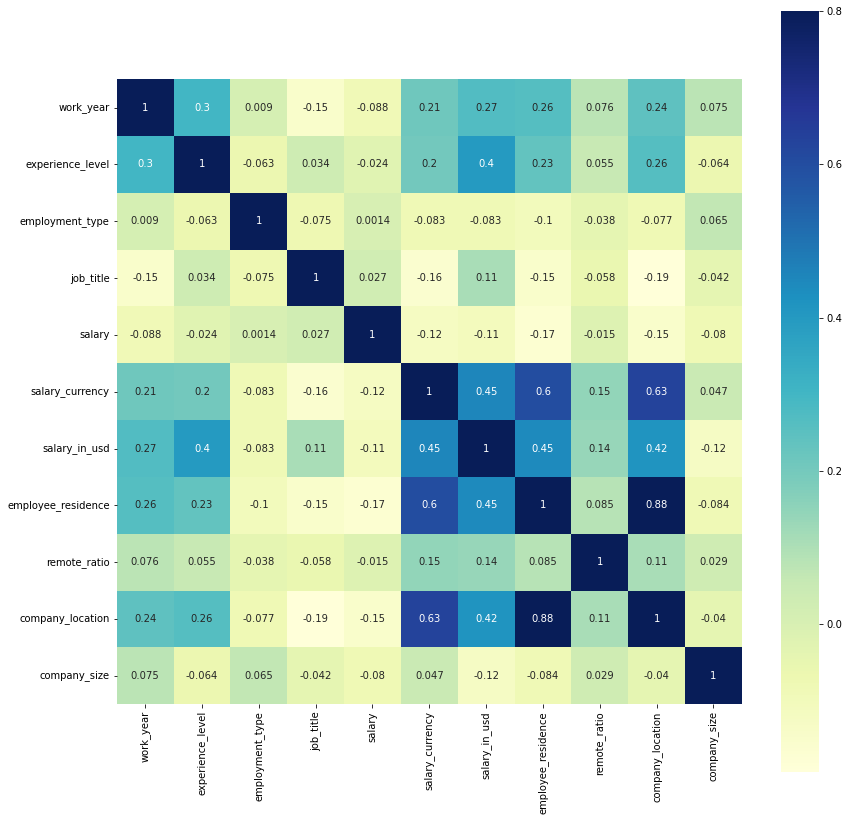

In [45]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),vmax=.8,square=True ,annot=True,cmap="YlGnBu")

## Train Test Split and Prediction

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

X = pd.get_dummies(X, drop_first=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train

work_year  experience_level  employment_type  job_title  salary  \
149       2021                 3                2          9  160000   
9         2020                 3                2         33  125000   
381       2022                 3                2         17  101570   
530       2022                 2                2         12   85000   
193       2021                 3                2         21  174000   
..         ...               ...              ...        ...     ...   
74        2021                 1                2         29  235000   
110       2021                 3                2         38   80000   
277       2021                 3                2          1   55000   
442       2022                 2                2         17   75000   
106       2021                 2                2         48  235000   

     salary_currency  employee_residence  remote_ratio  company_location  \
149               16                   6           100                48   
9                 16                  35            50                33   
381               16                  53           100                48   
530               16                   8             0                 6   
193               16                  53           100                48   
..               ...                 ...           ...               ...   
74                16                  53           100                48   
110                7                  17            50                15   
277               16                  46           100                42   
442                8                  52           100                47   
106                2                   8           100                 6   

     company_size  
149             2  
9               2  
381             1  
530             1  
193             0  
..            ...  
74              0  
110             0  
277             0  
442             1  
106             0  

[478 rows x 10 columns]

In [50]:
y_train

149    160000
9      125000
381    101570
530     85000
193    174000
        ...  
74     235000
110     94564
277     55000
442     98158
106    187442
Name: salary_in_usd, Length: 478, dtype: int64

In [51]:
X_test

work_year  experience_level  employment_type  job_title  salary  \
114       2021                 2                2         17   38400   
294       2022                 2                2         17  170000   
572       2022                 3                2         12  100000   
80        2021                 3                2         13   67000   
186       2021                 3                2         13   50000   
..         ...               ...              ...        ...     ...   
405       2022                 2                2         17   75000   
440       2022                 2                2         12   40000   
152       2021                 2                2         22   95000   
500       2022                 3                2         38   57000   
445       2022                 2                2         17   70000   

     salary_currency  employee_residence  remote_ratio  company_location  \
114                7                  34           100                32   
294               16                  53           100                48   
572               16                  53           100                48   
80                 7                  17           100                15   
186               16                  54           100                47   
..               ...                 ...           ...               ...   
405                8                  52             0                47   
440                7                  18           100                16   
152                2                   8           100                 6   
500                7                  34           100                32   
445                7                  18           100                16   

     company_size  
114             0  
294             1  
572             1  
80              0  
186             1  
..            ...  
405             1  
440             1  
152             0  
500             0  
445             1  

[120 rows x 10 columns]

In [52]:
y_test

114     45391
294    170000
572    100000
80      79197
186     50000
        ...  
405     98158
440     43966
152     75774
500     62651
445     76940
Name: salary_in_usd, Length: 120, dtype: int64

In [53]:
accuracy_list = []
models = []

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [56]:
predictions_linear=linear_model.predict(X_test)

In [57]:
predictions_linear

array([ 81832.0423887 , 129781.53567173, 138722.60763593,  80709.83344356,
       129687.43926865, 138698.63887582,   3717.38169322,  90520.38452551,
       128043.61678365, 115983.51817901, 112347.65476706,  86370.64066821,
        62891.67217096, 141640.50899361, 163972.02242001,  65079.81162651,
        79693.38028616,  68783.0504418 , 105408.82362526,  77644.02991034,
        74185.41114103, 142500.97635122, 115817.36696661, 143573.52069454,
        68173.84388482, 143885.33649524,  81918.15914838,  96098.06449039,
       143556.94036291,  99572.32319682, 143540.9417973 ,  63155.50815625,
       107470.61270095,  90433.8631098 , 117685.67719837,  98814.81194608,
        76838.63078237,  92454.39361513, 152955.19356003,  83110.10541575,
       148458.17618242,  41849.98837138, 138758.67712931, 138664.34376881,
       118274.15337473,  32964.5565032 ,  53160.71520892, 132357.82119411,
         4362.1107349 , 148356.94889457,  86671.47928799,  33090.21762985,
        85983.83000075, 1

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,predictions_linear)
MSE = mean_squared_error(y_test,predictions_linear)
RMSE = np.sqrt(MSE)

In [59]:
MAE

33164.537016589755

In [60]:
MSE

1803340542.887211

In [61]:
RMSE

42465.75729793608

In [62]:
linear_model

LinearRegression()

In [63]:
df['salary_in_usd'].mean()

107531.44983277592

In [64]:
from sklearn.metrics import r2_score

In [65]:
linear_score = r2_score(y_test,predictions_linear)
accuracy_list.append(linear_score)
models.append("Linear Model")

In [66]:
print("r-square: ",linear_score)

r-square:  0.4330915978852008


## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

y = df['salary_in_usd']

X_rf = df.drop(['salary_in_usd', 'salary_currency'], axis=1)

X_rf = pd.get_dummies(X_rf, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.2, random_state=42)

regressor_rf.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [69]:
predictions_rf = regressor_rf.predict(X_test)

In [70]:
MAE_rf = mean_absolute_error(y_test,predictions_rf)
MSE_rf = mean_squared_error(y_test,predictions_rf)
RMSE_rf = np.sqrt(MSE_rf)

In [71]:
print("MAE :" , MAE_rf)
print("MSE :" , MSE_rf)
print("RMSE :" , RMSE_rf)

MAE : 5518.852833333334
MSE : 232648734.59819838
RMSE : 15252.827101826022


In [72]:
rf_score = r2_score(y_test,predictions_rf)
accuracy_list.append(rf_score)
models.append("Random Forest")

In [73]:
print("r-square: ",r2_score(y_test,predictions_rf))

r-square:  0.9268632189825149


## XGBoost

In [74]:
import xgboost as xg

In [75]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 15, seed = 123)

In [76]:
xgb_r.fit(X_train, y_train)
  
predictions_xg = xgb_r.predict(X_test)

In [77]:
MAE_xg = mean_absolute_error(y_test,predictions_xg)
MSE_xg = mean_squared_error(y_test,predictions_xg)
RMSE_xg = np.sqrt(MSE_xg)

In [78]:
print("MAE :" , MAE_xg)
print("MSE :" , MSE_xg)
print("RMSE :" , RMSE_xg)

MAE : 5692.192568969726
MSE : 228034721.8764991
RMSE : 15100.818582994072


In [79]:
xg_score = r2_score(y_test,predictions_xg)
accuracy_list.append(xg_score)
models.append("XGBoost")

In [80]:
print("r-square: ",xg_score)

r-square:  0.9283137062960247


## CatBoost

In [81]:
!pip install catboost

In [82]:
from catboost import CatBoostRegressor

In [83]:
y = df['salary_in_usd']


X = df.drop(['salary_in_usd', 'salary_currency'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_model = CatBoostRegressor(n_estimators=100, random_state=42, verbose=False)


cat_model.fit(X_train, y_train)


predictions_cat = cat_model.predict(X_test)

In [84]:
MAE_cat = mean_absolute_error(y_test,predictions_cat)
MSE_cat = mean_squared_error(y_test,predictions_cat)
RMSE_cat = np.sqrt(MSE_cat)

In [85]:
print("MAE :" , MAE_cat)
print("MSE :" , MSE_cat)
print("RMSE :" , RMSE_cat)

MAE : 6931.807596508153
MSE : 207083715.75083676
RMSE : 14390.40359930314


In [86]:
cat_score = r2_score(y_test,predictions_cat)
accuracy_list.append(cat_score)
models.append("CatBoost")

In [87]:
print('R-Squared Score:', cat_score)

R-Squared Score: 0.9348999838863797


## K Neighbors Regressor

In [107]:
from sklearn import neighbors

for K in range(20):
    
    K = K+1
    
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)
    
    predictions_k =model.predict(X_test)
    
    r2 = r2_score(y_test, predictions_k)
    
    print('K : ',(K) ,' ','R-Squared Score:', r2)
    
# best result K=5 

K :  1   R-Squared Score: 0.8010003671256307
K :  2   R-Squared Score: 0.8986100091537018
K :  3   R-Squared Score: 0.9021372770815783
K :  4   R-Squared Score: 0.9086058572343678
K :  5   R-Squared Score: 0.9171432572556956
K :  6   R-Squared Score: 0.9098819553691483
K :  7   R-Squared Score: 0.9031224519233052
K :  8   R-Squared Score: 0.9151073413996786
K :  9   R-Squared Score: 0.9146192606560276
K :  10   R-Squared Score: 0.9078723780154048
K :  11   R-Squared Score: 0.8915751012908839
K :  12   R-Squared Score: 0.8874338392170085
K :  13   R-Squared Score: 0.8825935849128665
K :  14   R-Squared Score: 0.8836768016875667
K :  15   R-Squared Score: 0.8793039699901343
K :  16   R-Squared Score: 0.8776759460344965
K :  17   R-Squared Score: 0.8868264650877531
K :  18   R-Squared Score: 0.8822771227840236
K :  19   R-Squared Score: 0.8798947885277076
K :  20   R-Squared Score: 0.8767011050900269


In [117]:
model_k = neighbors.KNeighborsRegressor(n_neighbors = 5)

model_k.fit(X_train, y_train)

predictions_k =model_k.predict(X_test)

In [118]:
MAE_k = mean_absolute_error(y_test,predictions_k)
MSE_k = mean_squared_error(y_test,predictions_k)
RMSE_k = np.sqrt(MSE_k)

In [119]:
print("MAE :" , MAE_k)
print("MSE :" , MSE_k)
print("RMSE :" , RMSE_k)

MAE : 7695.280000000001
MSE : 263568017.1346667
RMSE : 16234.778013100971


In [120]:
k_score = r2_score(y_test,predictions_k)
accuracy_list.append(k_score)
models.append("K Neighbors")

In [121]:
print('R-Squared Score:', k_score)

R-Squared Score: 0.9171432572556956


## Results

In [94]:
models

['Linear Model', 'Random Forest', 'XGBoost', 'CatBoost', 'K Neighbors']

In [97]:
accuracy_list

[0.4330915978852008,
 0.9268632189825149,
 0.9283137062960247,
 0.9348999838863797,
 0.9171432572556956]

In [113]:
results = pd.DataFrame(accuracy_list,index=models,columns=["result"])

In [114]:
results

result
Linear Model   0.433092
Random Forest  0.926863
XGBoost        0.928314
CatBoost       0.934900
K Neighbors    0.917143